In [ ]:
!pip install pandas
!pip install textblob

In [ ]:
from textblob import TextBlob
import pandas as pd

import statsmodels.api as sm
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_1samp

In [ ]:
def get_polarity(text) :
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity

    return sentiment_score

def get_subjectivity(text) :
    blob = TextBlob(text)
    subjectivity_score = blob.sentiment.subjectivity

    return subjectivity_score

##### Submissions

In [ ]:
submissions_df = pd.read_csv("comm557_submissions_df.csv", index_col=0)

In [ ]:
# testing
print(f"polarity: {get_polarity(submissions_df['text'][0])}")
print(f"subjectivity: {get_subjectivity(submissions_df['text'][0])}")

polarity: 0.1980769230769231
subjectivity: 0.43846153846153846


In [ ]:
submissions_df['polarity'] = submissions_df['text'].apply(lambda x: get_polarity(x))
submissions_df['subjectivity'] = submissions_df['text'].apply(lambda x: get_subjectivity(x))

In [ ]:
count_positive_polarity = submissions_df['polarity'][submissions_df['polarity'] > 0].count()
count_negative_polarity = submissions_df['polarity'][submissions_df['polarity'] < 0].count()
print(f"Number of Positive Submissions: {count_positive_polarity} [{round(count_positive_polarity/len(submissions_df), 4) * 100}%]")
print(f"Number of Negative Submissions: {count_negative_polarity} [{round(count_negative_polarity/len(submissions_df), 4) * 100}%]")

count_positive_subjectivity = submissions_df['subjectivity'][submissions_df['subjectivity'] > 0.5].count()
count_negative_subjectivity = submissions_df['subjectivity'][submissions_df['subjectivity'] < 0.5].count()
print(f"Number of Submissions > 0.5 Subjectivity: {count_positive_subjectivity} [{round(count_positive_subjectivity/len(submissions_df), 4) * 100}%]")
print(f"Number of Submissions < 0.5 Subjectivity: {count_negative_subjectivity} [{round(count_negative_subjectivity/len(submissions_df), 4) * 100}%]")

Number of Positive Submissions: 2057 [67.13%]
Number of Negative Submissions: 989 [32.28%]
Number of Submissions > 0.5 Subjectivity: 1308 [42.69%]
Number of Submissions < 0.5 Subjectivity: 1737 [56.69%]


In [ ]:
submissions_df

,id,full_id,author,title,text,url,is_self,created_utc,edited,num_comments,is_locked,is_over_18,score,upvote_ratio,link,polarity,subjectivity
0,1793g27,t3_1793g27,jelindrael,What are books with only strategies on how to ...,"Basically, I am looking for a book that will j...",https://www.reddit.com/r/ADHD/comments/1793g27...,True,2023-10-16 11:06:54,False,2,False,False,1,1.00,/r/ADHD/comments/1793g27/what_are_books_with_o...,0.198077,0.438462
1,1793f20,t3_1793f20,Babybabyyyx,Teach me how to be quieter,I always feel bad when I talk too much regardl...,https://www.reddit.com/r/ADHD/comments/1793f20...,True,2023-10-16 11:05:06,False,1,False,False,1,1.00,/r/ADHD/comments/1793f20/teach_me_how_to_be_qu...,0.090741,0.514815
2,1793bb4,t3_1793bb4,Tip_Of_The_Sauce,Not sure where to go from here,My entire life I’ve been told that I have ADHD...,https://www.reddit.com/r/ADHD/comments/1793bb4...,True,2023-10-16 10:59:05,False,1,False,False,1,1.00,/r/ADHD/comments/1793bb4/not_sure_where_to_go_...,0.004545,0.490909
3,1793a88,t3_1793a88,Cursed_Creative,Forgetting that you remembered?,I don't know if this is a new phenomenon for m...,https://www.reddit.com/r/ADHD/comments/1793a88...,True,2023-10-16 10:56:56,False,1,False,False,1,1.00,/r/ADHD/comments/1793a88/forgetting_that_you_r...,-0.080219,0.484764
4,17932t2,t3_17932t2,comingloose,what was the thing that finally helped you sto...,What’s been your “silver bullet” for getting a...,https://www.reddit.com/r/ADHD/comments/17932t2...,True,2023-10-16 10:43:04,False,1,False,False,2,1.00,/r/ADHD/comments/17932t2/what_was_the_thing_th...,0.062500,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,17sgq12,t3_17sgq12,anonymousdumbhoe,ADHD + OCD oversharing = hellish combo..,I keep accidentally oversharing things and the...,https://www.reddit.com/r/ADHD/comments/17sgq12...,True,2023-11-10 23:17:04,2023-11-10 23:27:03,2,False,False,4,1.00,/r/ADHD/comments/17sgq12/adhd_ocd_oversharing_...,0.231410,0.486538
3060,17sgljq,t3_17sgljq,SPdoc,I’m often seen as defensive if I explain or co...,"First off, does anyone else have this problem ...",https://www.reddit.com/r/ADHD/comments/17sgljq...,True,2023-11-10 23:11:13,False,12,False,False,11,1.00,/r/ADHD/comments/17sgljq/im_often_seen_as_defe...,-0.065625,0.269792
3061,17sg00i,t3_17sg00i,diamondaires,"My professor wants proof, who should I go to?",I asked for an extension on my assignments and...,https://www.reddit.com/r/ADHD/comments/17sg00i...,True,2023-11-10 22:43:35,False,39,False,False,7,0.83,/r/ADHD/comments/17sg00i/my_professor_wants_pr...,-0.250000,0.250000
3062,17sfvtx,t3_17sfvtx,suckadipdumbshitz,"Misdiagnosed with ADHD, How was I able to take...","As the title says, my old psychiatrist diagnos...",https://www.reddit.com/r/ADHD/comments/17sfvtx...,True,2023-11-10 22:38:10,False,4,False,False,2,1.00,/r/ADHD/comments/17sfvtx/misdiagnosed_with_adh...,0.141761,0.527519


In [ ]:
submissions_scores_df = submissions_df[['full_id', 'polarity', 'subjectivity']]

submissions_scores_df

,full_id,polarity,subjectivity
0,t3_1793g27,0.198077,0.438462
1,t3_1793f20,0.090741,0.514815
2,t3_1793bb4,0.004545,0.490909
3,t3_1793a88,-0.080219,0.484764
4,t3_17932t2,0.062500,0.571429
...,...,...,...
3059,t3_17sgq12,0.231410,0.486538
3060,t3_17sgljq,-0.065625,0.269792
3061,t3_17sg00i,-0.250000,0.250000
3062,t3_17sfvtx,0.141761,0.527519


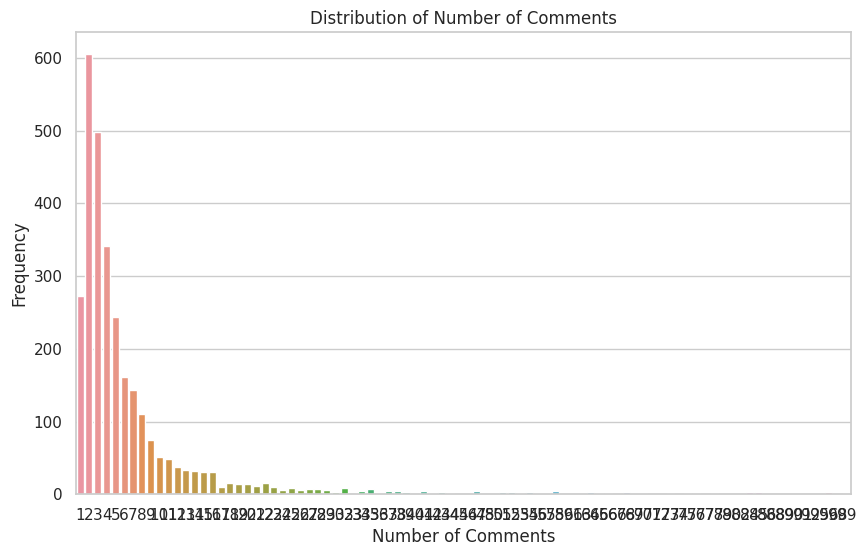

In [ ]:
grouped_df = submissions_df.copy()
grouped_df = grouped_df[grouped_df['num_comments'] < 100]
grouped_df = grouped_df['num_comments'].value_counts()

# bins = [0, 10, 50, 100, 300, 500, 1000]  # Define your own bin edges
# bin_labels = ['0-10', '11-50', '51-100', '101-300', '301-500', '501-1000']  # Labels for each bin

# grouped_df['comment_bins'] = pd.cut(grouped_df['num_comments'], bins=bins, labels=bin_labels, right=False)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set_palette('crest')

# sns.barplot(x='comment_bins', y='num_comments', data=grouped_df, estimator=sum)
sns.barplot(x=grouped_df.index, y=grouped_df.values)

plt.title('Distribution of Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()

##### Comments

In [ ]:
comments_df = pd.read_csv("comm557_comments_df.csv", index_col=0)

In [ ]:
# testing
print(f"polarity: {get_polarity(comments_df['body'][0])}")
print(f"subjectivity: {get_subjectivity(comments_df['body'][0])}")

polarity: -0.2
subjectivity: 0.8


In [ ]:
comments_df['polarity'] = comments_df['body'].apply(lambda x: get_polarity(x))
# comments_df['subjectivity'] = comments_df['body'].apply(lambda x: get_subjectivity(x))

In [ ]:
count_positive_polarity = comments_df['polarity'][comments_df['polarity'] > 0].count()
count_negative_polarity = comments_df['polarity'][comments_df['polarity'] < 0].count()
print(f"Number of Positive Comments: {count_positive_polarity} [{round(count_positive_polarity/len(comments_df), 4) * 100}%]")
print(f"Number of Negative Comments: {count_negative_polarity} [{round(count_negative_polarity/len(comments_df), 4) * 100}%]")

# count_positive_subjectivity = comments_df['subjectivity'][comments_df['subjectivity'] > 0.5].count()
# count_negative_subjectivity = comments_df['subjectivity'][comments_df['subjectivity'] < 0.5].count()
# print(f"Number of Comments > 0.5 Subjectivity: {count_positive_subjectivity} [{round(count_positive_subjectivity/len(comments_df), 4) * 100}%]")
# print(f"Number of Comments < 0.5 Subjectivity: {count_negative_subjectivity} [{round(count_negative_subjectivity/len(comments_df), 4) * 100}%]")

Number of Positive Comments: 25057 [57.47%]
Number of Negative Comments: 10809 [24.79%]


In [ ]:
comments_df

,id,author,body,created_utc,edited,distinguished,replies,submission_id,parent_id,is_submitter,is_stickied,score,link,polarity
0,k53n1ca,throwawaytheist,The Anti Planner\n\nIt's literally just a list...,2023-10-16 11:12:54,False,NaN,0,t3_1793g27,t3_1793g27,False,False,1,/r/ADHD/comments/1793g27/what_are_books_with_o...,-0.200000
1,k53pelr,No-Sea1173,Don't know any books sorry. \n\nMaybe this wil...,2023-10-16 11:37:22,False,NaN,0,t3_1793g27,t3_1793g27,False,False,1,/r/ADHD/comments/1793g27/what_are_books_with_o...,-0.500000
2,k53nmyv,Erpelpelle,"You can try to focus on your breathing, recogn...",2023-10-16 11:19:19,False,NaN,0,t3_1793f20,t3_1793f20,False,False,1,/r/ADHD/comments/1793f20/teach_me_how_to_be_qu...,0.089815
3,k53o6hz,Cursed_Creative,"Not to discourage you, but just for N=1, my ex...",2023-10-16 11:24:57,False,NaN,0,t3_1792v8g,t3_1792v8g,False,False,1,/r/ADHD/comments/1792v8g/research_student_prod...,0.295887
4,k53kt93,CaberTosser_,Yeah. Dopamine deficiency and depression can c...,2023-10-16 10:48:09,False,NaN,0,t3_1792p91,t3_1792p91,False,False,2,/r/ADHD/comments/1792p91/i_dont_remember_anyth...,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,k8psrst,Benu5,">When I was being medicated, I was very anxiou...",2023-11-10 23:43:28,False,NaN,0,t3_17sfvtx,t3_17sfvtx,False,False,1,/r/ADHD/comments/17sfvtx/misdiagnosed_with_adh...,-0.039474
43593,k8ru401,FuzzyAd9604,"You've got both, it's super common & or they h...",2023-11-11 11:44:50,False,NaN,0,t3_17sfvtx,t3_17sfvtx,False,False,1,/r/ADHD/comments/17sfvtx/misdiagnosed_with_adh...,0.344444
43594,k8qxjkx,ADHD-Fens,I would say anything that has you learning ski...,2023-11-11 05:04:59,False,NaN,1,t3_17sfu81,t3_17sfu81,False,False,3,/r/ADHD/comments/17sfu81/best_and_worst_therap...,0.040595
43595,k8ucf2e,ThrowThinkAway,"This was insightful, thank you. The point abou...",2023-11-11 21:36:15,False,NaN,1,t3_17sfu81,t1_k8qxjkx,True,False,1,/r/ADHD/comments/17sfu81/best_and_worst_therap...,0.038462


In [ ]:
comments_scores_df = comments_df[['submission_id', 'polarity']]

comments_scores_df

,submission_id,polarity
0,t3_1793g27,-0.200000
1,t3_1793g27,-0.500000
2,t3_1793f20,0.089815
3,t3_1792v8g,0.295887
4,t3_1792p91,0.000000
...,...,...
43592,t3_17sfvtx,-0.039474
43593,t3_17sfvtx,0.344444
43594,t3_17sfu81,0.040595
43595,t3_17sfu81,0.038462


In [ ]:
comments_scores_df = comments_scores_df.groupby('submission_id', as_index=False)[['polarity']].mean()

comments_scores_df # 2729

,submission_id,polarity
0,t3_174zl37,0.000000
1,t3_174zsxh,0.092373
2,t3_174ztrs,0.000000
3,t3_1750cdz,-0.011735
4,t3_1750mqt,0.363636
...,...,...
2724,t3_17w3h7c,0.040404
2725,t3_17w3icj,-0.127292
2726,t3_17w3txo,0.048530
2727,t3_17w40y3,-0.021914


In [ ]:
test_df = comments_scores_df[comments_scores_df['submission_id'] == 't3_1793g27']

test_df

,submission_id,polarity
651,t3_1793g27,-0.35


In [ ]:
merged_df = pd.merge(comments_df, comments_scores_df, on='submission_id', how='left', suffixes=('', '_average'))
merged_df['polarity_difference'] = merged_df['polarity'] - merged_df['polarity_average']

merged_df

,id,author,body,created_utc,edited,distinguished,replies,submission_id,parent_id,is_submitter,is_stickied,score,link,polarity,polarity_average,polarity_difference
0,k53n1ca,throwawaytheist,The Anti Planner\n\nIt's literally just a list...,2023-10-16 11:12:54,False,NaN,0,t3_1793g27,t3_1793g27,False,False,1,/r/ADHD/comments/1793g27/what_are_books_with_o...,-0.200000,-0.350000,0.150000
1,k53pelr,No-Sea1173,Don't know any books sorry. \n\nMaybe this wil...,2023-10-16 11:37:22,False,NaN,0,t3_1793g27,t3_1793g27,False,False,1,/r/ADHD/comments/1793g27/what_are_books_with_o...,-0.500000,-0.350000,-0.150000
2,k53nmyv,Erpelpelle,"You can try to focus on your breathing, recogn...",2023-10-16 11:19:19,False,NaN,0,t3_1793f20,t3_1793f20,False,False,1,/r/ADHD/comments/1793f20/teach_me_how_to_be_qu...,0.089815,0.089815,0.000000
3,k53o6hz,Cursed_Creative,"Not to discourage you, but just for N=1, my ex...",2023-10-16 11:24:57,False,NaN,0,t3_1792v8g,t3_1792v8g,False,False,1,/r/ADHD/comments/1792v8g/research_student_prod...,0.295887,0.295887,0.000000
4,k53kt93,CaberTosser_,Yeah. Dopamine deficiency and depression can c...,2023-10-16 10:48:09,False,NaN,0,t3_1792p91,t3_1792p91,False,False,2,/r/ADHD/comments/1792p91/i_dont_remember_anyth...,0.000000,0.237733,-0.237733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,k8psrst,Benu5,">When I was being medicated, I was very anxiou...",2023-11-10 23:43:28,False,NaN,0,t3_17sfvtx,t3_17sfvtx,False,False,1,/r/ADHD/comments/17sfvtx/misdiagnosed_with_adh...,-0.039474,0.152485,-0.191959
43593,k8ru401,FuzzyAd9604,"You've got both, it's super common & or they h...",2023-11-11 11:44:50,False,NaN,0,t3_17sfvtx,t3_17sfvtx,False,False,1,/r/ADHD/comments/17sfvtx/misdiagnosed_with_adh...,0.344444,0.152485,0.191959
43594,k8qxjkx,ADHD-Fens,I would say anything that has you learning ski...,2023-11-11 05:04:59,False,NaN,1,t3_17sfu81,t3_17sfu81,False,False,3,/r/ADHD/comments/17sfu81/best_and_worst_therap...,0.040595,0.085558,-0.044963
43595,k8ucf2e,ThrowThinkAway,"This was insightful, thank you. The point abou...",2023-11-11 21:36:15,False,NaN,1,t3_17sfu81,t1_k8qxjkx,True,False,1,/r/ADHD/comments/17sfu81/best_and_worst_therap...,0.038462,0.085558,-0.047096


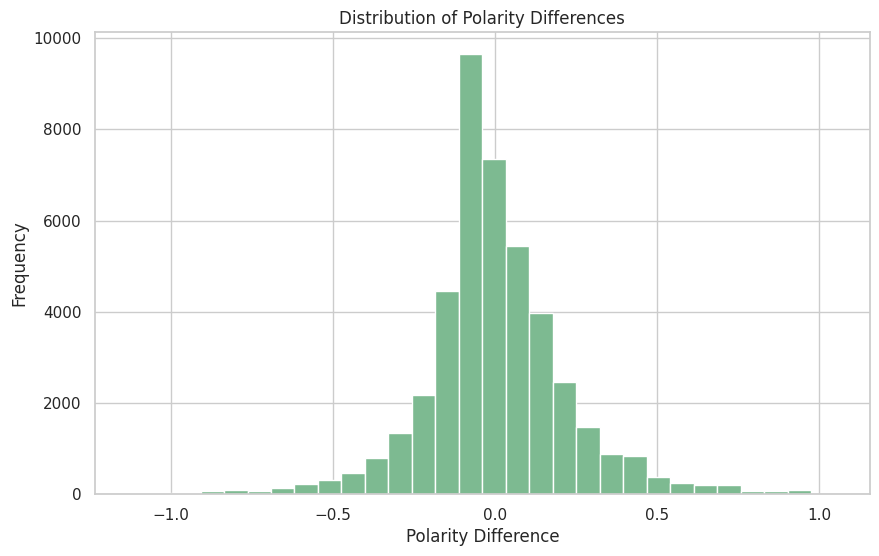

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set_palette('crest')

plt.hist(merged_df['polarity_difference'], bins=30)
plt.title('Distribution of Polarity Differences')
plt.xlabel('Polarity Difference')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# t_stat, p_value = ttest_1samp(merged_df['polarity_difference'], 0)
hello = ttest_1samp(merged_df['polarity_difference'], 0)

# print(f"t-stat: {t_stat}")
# print(f"p-value: {p_value}")
print(hello)

TtestResult(statistic=8.523678170531596e-17, pvalue=1.0, df=43596)


In [ ]:
merged_df = pd.merge(submissions_scores_df, comments_scores_df,
                     left_on='full_id', right_on='submission_id', how='inner')
merged_df = merged_df.drop('submission_id', axis=1)

merged_df

,full_id,polarity_x,subjectivity,polarity_y
0,t3_1793g27,0.198077,0.438462,-0.350000
1,t3_1793f20,0.090741,0.514815,0.089815
2,t3_1792v8g,0.000000,0.333333,0.295887
3,t3_1792p91,0.082292,0.466518,0.237733
4,t3_1791ysk,0.279167,0.476543,0.125000
...,...,...,...,...
2724,t3_17sgq12,0.231410,0.486538,-0.221111
2725,t3_17sgljq,-0.065625,0.269792,0.016377
2726,t3_17sg00i,-0.250000,0.250000,0.108913
2727,t3_17sfvtx,0.141761,0.527519,0.152485


##### Correlation Analysis

In [ ]:
# relationship between the polarity of the submission and the polarity of the comments for that submission
# is there a significant correlation between playtime_at_review and weighted_score?

x = merged_df['polarity_x']
y = merged_df['polarity_y']

corr_coef, p_value = pearsonr(x, y)
print("Pearson's correlation between submission polarity and comments polarity:", corr_coef, "\tp-value:", round(p_value, 4))
if corr_coef > 0 and p_value < 0.05 :
    print("There's a significant positive relationship.")
elif corr_coef < 0 and p_value < 0.05 :
    print("There's a significant negative relationship.")
else :
    print("No relationships can be drawn.")

print("\n**********\n")

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())

Pearson's correlation between submission polarity and comments polarity: 0.10533770799359873 	p-value: 0.0
There's a significant positive relationship.

**********

                            OLS Regression Results                            
Dep. Variable:             polarity_y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     30.60
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           3.47e-08
Time:                        18:25:28   Log-Likelihood:                 1478.0
No. Observations:                2729   AIC:                            -2952.
Df Residuals:                    2727   BIC:                            -2940.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t  

In [ ]:
# from statsmodels.stats.diagnostic import het_goldfeldquandt

In [ ]:
# residuals = model.resid
# predicted_values = model.fittedvalues

# sns.set(style="whitegrid")
# plt.figure(figsize=(10, 6))
# sns.set_palette('crest')

# plt.scatter(predicted_values, residuals)
# plt.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.3)
# plt.xlabel('Predicted Values')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.show()

In [ ]:
# _, p_value, _ = het_goldfeldquandt(model.resid, model.model.exog)
# print("Goldfeld-Quandt test p-value:", p_value)

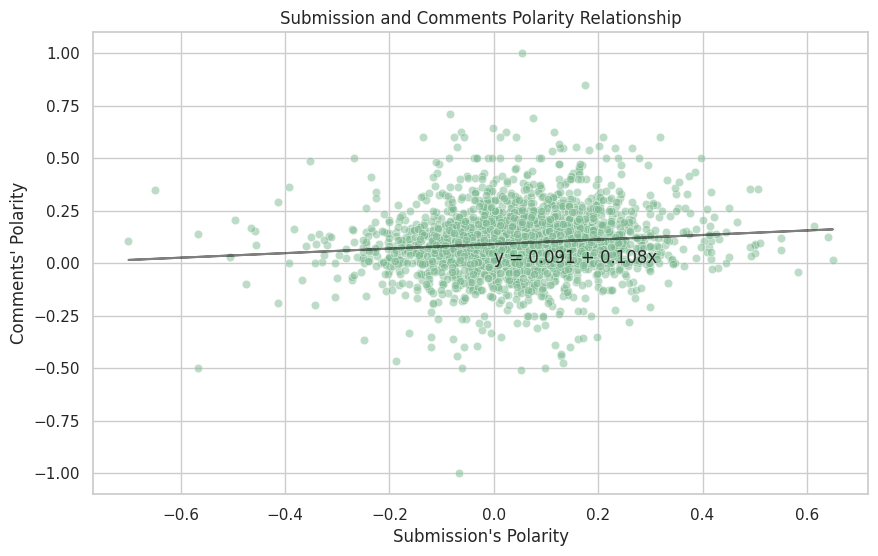

In [ ]:
# plotting

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set_palette('crest')

a, b = np.polyfit(merged_df['polarity_x'], merged_df['polarity_y'], 1)

sns.scatterplot(data=merged_df, x="polarity_x", y="polarity_y", alpha=0.5)
plt.plot(merged_df['polarity_x'], a*merged_df['polarity_x']+b, color="black", alpha=0.5)
plt.text(0, 0, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

plt.xlabel("Submission's Polarity")
plt.ylabel("Comments' Polarity")
plt.title("Submission and Comments Polarity Relationship")

plt.savefig('polarity_correlation.png')
plt.show()

In [ ]:
# relationship between the polarity of the submission and the polarity of the comments for that submission
# is there a significant correlation between playtime_at_review and weighted_score?

x = merged_df['subjectivity_x']
y = merged_df['subjectivity_y']

corr_coef, p_value = pearsonr(x, y)
print("Pearson's correlation between submission subjectivity and comments subjectivity:", corr_coef, "\tp-value:", round(p_value, 4))
if corr_coef > 0 and p_value < 0.05 :
    print("There's a significant positive relationship.")
elif corr_coef < 0 and p_value < 0.05 :
    print("There's a significant negative relationship.")
else :
    print("No relationships can be drawn.")

print("\n**********\n")

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())

Pearson's correlation between submission subjectivity and comments subjectivity: 0.0636619083104948 	p-value: 0.0009
There's a significant positive relationship.

**********

                            OLS Regression Results                            
Dep. Variable:         subjectivity_y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     11.10
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           0.000876
Time:                        02:55:07   Log-Likelihood:                 1447.1
No. Observations:                2729   AIC:                            -2890.
Df Residuals:                    2727   BIC:                            -2878.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std er

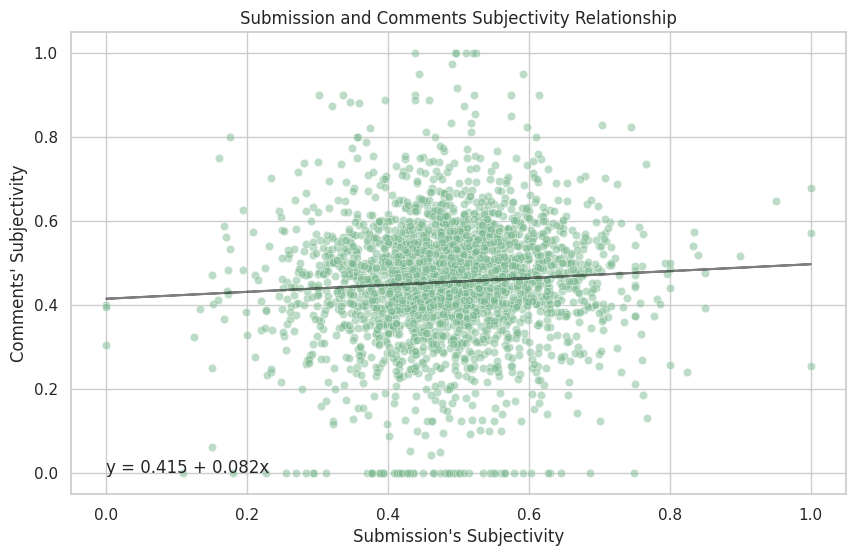

In [ ]:
# plotting

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.set_palette('crest')

a, b = np.polyfit(merged_df['subjectivity_x'], merged_df['subjectivity_y'], 1)

sns.scatterplot(data=merged_df, x="subjectivity_x", y="subjectivity_y", alpha=0.5)
plt.plot(merged_df['subjectivity_x'], a*merged_df['subjectivity_x']+b, color="black", alpha=0.5)
plt.text(0, 0, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

plt.xlabel("Submission's Subjectivity")
plt.ylabel("Comments' Subjectivity")
plt.title("Submission and Comments Subjectivity Relationship")

plt.savefig('subjectivity_correlation.png')
plt.show()